C:\Users\thewe\anaconda3\envs\crocusenv\Lib\site-packages\pyproj\__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()
Cannot find header.dxf (GDAL_DATA is not defined)


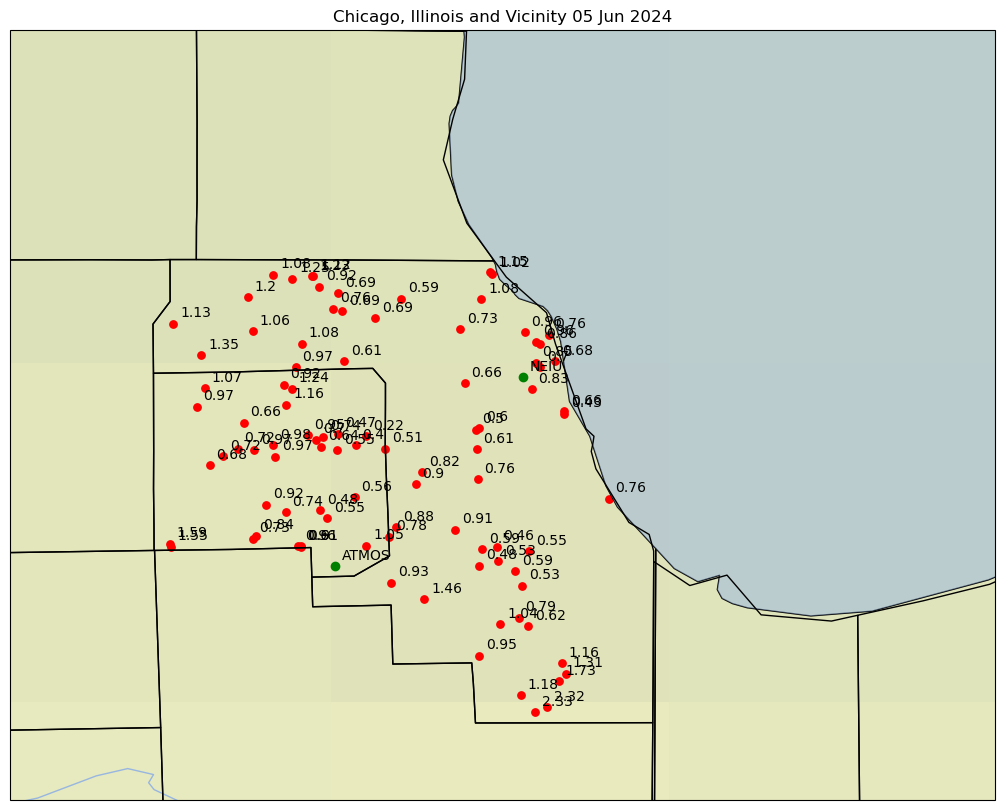

In [5]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
from cartopy import crs as ccrs, feature as cfeature
import cartopy.io.shapereader as shpreader
import pandas as pd
from metpy.plots import USCOUNTIES

file_sat = 'http://data.cocorahs.org/export/exportreports.aspx?ReportType=Daily&dtf=1&Format=CSV&State=IL&County=DP&ReportDateType=reportdate&Date=6/05/2024&TimesInGMT=True'
file_sat2 = 'http://data.cocorahs.org/export/exportreports.aspx?ReportType=Daily&dtf=1&Format=CSV&State=IL&County=CK&ReportDateType=reportdate&Date=6/05/2024&TimesInGMT=True'

def rain_plot(filepath, filepath2, output_file):
    # Read the CSV files into DataFrames
    df1 = pd.read_csv(filepath)
    df2 = pd.read_csv(filepath2)
    
    figure = plt.figure(figsize=(16, 10))
    ax = figure.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.STATES)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(USCOUNTIES)
    
    # Sort the times, convert to datetime, and extract the day, month, and year
    year_month_day = pd.to_datetime(df1.sort_values('ObservationDate', ascending=False).ObservationDate.values[0]).strftime('%d %b %Y')
    ax.set_title(f'Chicago, Illinois and Vicinity {year_month_day}')
    ax.set_extent([-88.474769, -87.020042, 41.356063, 42.493302])
    ax.stock_img()
    
    crs = ccrs.PlateCarree()
    WAGGLE_SITES = {
        'NEIU': [41.980289109, -87.71703552],
        'ATMOS': [41.701605152, -87.995196552]
    }
    ax.plot(WAGGLE_SITES["ATMOS"][1], WAGGLE_SITES["ATMOS"][0], color="Green", marker="o", transform=ccrs.PlateCarree())
    ax.text(WAGGLE_SITES["ATMOS"][1] + 0.01, WAGGLE_SITES["ATMOS"][0] + 0.01, "ATMOS", color="Black", transform=ccrs.PlateCarree())
    ax.plot(WAGGLE_SITES["NEIU"][1], WAGGLE_SITES["NEIU"][0], color="Green", marker="o", transform=ccrs.PlateCarree())
    ax.text(WAGGLE_SITES["NEIU"][1] + 0.01, WAGGLE_SITES["NEIU"][0] + 0.01, "NEIU", color="Black", transform=ccrs.PlateCarree())
    
    # Plot the data from both DataFrames
    for df in [df1, df2]:
        for i in range(len(df["Longitude"])):
            ax.text(df["Longitude"][i] + 0.01, df["Latitude"][i] + 0.01, df["TotalPrecipAmt"][i], color="Black", transform=ccrs.PlateCarree())
        plt.scatter(
            x=df["Longitude"],
            y=df["Latitude"],
            color="red",
            s=28,
            alpha=1,
            transform=ccrs.PlateCarree()
        )
    
    # Save the plot as an image file
    plt.savefig(output_file, bbox_inches='tight')
    plt.show()

# Call the function with both file paths and specify the output file name
rain_plot(file_sat, file_sat2, 'rainfall_plot.png')
